In [1]:
from ipyparallel import Client

c = Client(profile='default')

lview = c.load_balanced_view()
dview = c[:]
lview.block = False

In [2]:
%%px --local
import sys
import numpy as np
import scipy as sp
import scipy.optimize as opt
import time
from IPython.display import display, clear_output
from psyFitLib import *

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# range init
x = np.array([0.05, 0.05, 1.0, 2.0]) 

# number of tested speed and freq
nF = 5
nS = 5  

# options for optimization     
options={'ftol': 1e-10, 'disp': False, 'maxiter': 20000, 'maxfev': 20000}

# freq range
freq1 = np.array([20.0, 24, 32, 40, 48])/25.6
freq2 = np.array([12.0, 16.0, 20.0, 24, 32])/25.6
freq = np.array([12.0, 16.0, 20.0, 24, 32, 40, 48])/25.6

# log speed
v0=0.3
speed=np.log(1+np.linspace(2,13,100)/v0)
speed5=np.log(1+np.array([3,4,5,6,7])/v0)
speed10=np.log(1+np.array([8,9,10,11,12])/v0)

In [4]:
# senar 1, 2, 3,...
overlap = 1 # do not set to zero: the figures will produce errors
senar = 3

syntxt = 'syn' 

# choose model of log-prior slope
aConst = 0 # constant
aLin = 0 # linear
# if both are zero the log-prior slope is non-parametric



In [21]:

if senar==0:
    # az decreasing sz increasing
    fileName = 'senar0'
    sz = 0.03+0.02*freq 
    az = -5.0*freq
elif senar==1:
    # az decreasing sz decreasing
    fileName = 'senar1'
    sz = 0.3-0.08*freq 
    az = -5.0*freq
elif senar==2:
    # az constant sz increasing 
    fileName = 'senar2'
    sz = 0.03+0.08*freq 
    az = -3.5*freq/freq
elif senar==3:
    # az decreasing sz constant
    fileName = 'senar3'
    sz = 0.08 * freq/freq 
    az = -4.0*freq


mu1 =  +speed5[2]+az[2]*sz[2]-az[0:5]*sz[0:5] 
si1 = np.sqrt(sz[0:5] + sz[2])
mu2 =  +speed5[2]+az[4]*sz[4]-az[2:7]*sz[2:7] 
si2 =  np.sqrt(sz[2:7] + sz[5]) 

speedSamp = speed5

aa1, aa2, aa3, aa4 = [0.02 for i in range(4)]
bb1, bb2, bb3, bb4 = [0.02 for i in range(4)]

THpsych0 = psyFun(np.array([speed5]).T,aa1,bb1,mu1,si1)
THpsych1 = psyFun(np.array([speed5]).T,aa2,bb2,mu2,si2)

nBlock = 10
nBlocks = np.array([nBlock])

psych0 = np.zeros((nS,nF,nBlock))
psych1 = np.zeros((nS,nF,nBlock))

np.random.seed([100])

for u in range(nBlock):
    psych0[:,:,u] = np.random.binomial(10,THpsych0,(nS,nF))#/10.0
    psych1[:,:,u] = np.random.binomial(10,THpsych1,(nS,nF))#/10.0


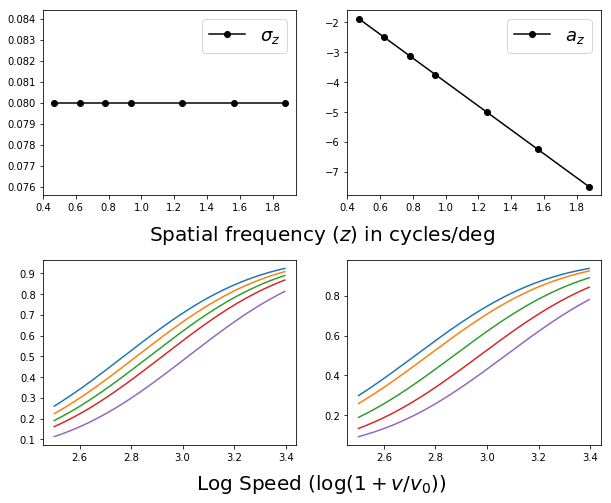

In [17]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
fig1.subplots_adjust(wspace=0.2, hspace=0.35)

spe = speed[(speed>2.5) & (speed<3.4)]
spe = spe[:,np.newaxis]
speedn = speed[:,np.newaxis]

axes1[0,0].plot(freq,sz, ls='-', marker='o', color='k', label='$\sigma_z$')
axes1[0,1].plot(freq,az, ls='-', marker='o', color='k', label='$a_z$')
axes1[1,0].plot(spe, psyFun(spe,aa1,bb1,mu1,si1));
axes1[1,1].plot(spe, psyFun(spe,aa2,bb2,mu2,si2));

axes1[0,0].set_xlabel(r'Spatial frequency ($z$) in cycles/deg', fontsize=20);
axes1[0,0].xaxis.set_label_coords(1.1, -0.15)

axes1[1,0].set_xlabel(r'Log Speed ($\log(1+v/v_0)$)', fontsize=20);
axes1[1,0].xaxis.set_label_coords(1.1, -0.15)

axes1[0,0].legend(fontsize=18, loc='best')
axes1[0,1].legend(fontsize=18, loc='best')

In [12]:
if overlap == 1:
    if aConst == 1:
        %run -i fitAconstOverlap0.py
    elif aLin == 1:
        %run -i fitAlinOverlap0.py
    else:
        %run -i fitOverlap0.py
else:
    if aConst == 1:
        %run -i fit0Aconst.py
    elif aLin == 1:
        %run -i fit0Alin.py
    else:
        %run -i fit0.py

Blocks number: 10 
 Global opt. 
 Progress: 100.0 %
Time (s): 25.4114971161


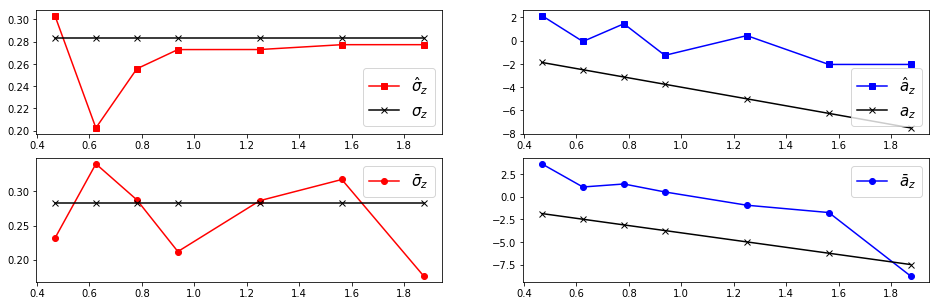

In [52]:
# fig
# check fit

fig0, axes0 = plt.subplots(nrows=2, ncols=2,figsize=(16, 5))

nb = 5
if aConst==1:
    a1 = xx[8]
    b1 = xx[9]
    a2 = xx[10]
    b2 = xx[11]
    axes0[0,0].plot(freq[0:7], np.sqrt(sz0), '-s', c='r', label='$\hat{\sigma}_z$');
    axes0[0,1].plot(freq[0:7], az0*np.ones(7), '-s', c='b', label='$\hat{a}_z$');
    axes0[1,0].plot(freq[0:7], np.sqrt(xx[1:8]), '-o', c='r', label='$\bar{\sigma}_z$'); #sig
    axes0[1,1].plot(freq[0:7], xx[0]*np.ones(7), '-o', label='$\bar{a}_z$'); # a

elif aLin==1:
    a1 = xx[9]
    b1 = xx[10]
    a2 = xx[11]
    b2 = xx[12]
    axes0[0,0].plot(freq[0:7], np.sqrt(sz0), '-s', c='r', label='$\hat{\sigma}_z$');
    axes0[0,1].plot(freq[0:7], az0[0]*freq+az0[1], '-s', c='b');
    axes0[1,0].plot(freq[0:7], np.sqrt(xx[2:9]), '-o', c='r', label=r'$\bar{\sigma}_z$'); #sig
    axes0[1,1].plot(freq[0:7], xx[0]*freq+xx[1], '-o', c='b', label=r'$\bar{a}_z$'); # a
else:
    a1 = xx[14]
    b1 = xx[15]
    a2 = xx[16]
    b2 = xx[17]
    axes0[0,0].plot(freq[0:7], np.sqrt(sz0), '-s', c='r', label='$\hat{\sigma}_z$');
    axes0[0,1].plot(freq[0:7], az0.T, '-s', c='b', label='$\hat{a}_z$');
    axes0[1,0].plot(freq[0:7], np.sqrt(xx[7:14]), '-o', c='r', label=r'$\bar{\sigma}_z$'); #sig
    axes0[1,1].plot(freq[0:7], xx[0:7], '-o', c='b', label=r'$\bar{a}_z$'); # a


axes0[1,1].plot(freq,az, color='k', marker='x')
axes0[0,1].plot(freq,az, color='k', marker='x', label='$a_z$')
axes0[1,0].plot(freq,np.sqrt(sz), color='k', marker='x')
axes0[0,0].plot(freq,np.sqrt(sz), color='k', marker='x', label='$\sigma_z$')

axes0[1,1].legend(loc='best',fontsize=15.0);
axes0[1,0].legend(loc='best',fontsize=15.0);
axes0[0,1].legend(loc='best',fontsize=15.0);
axes0[0,0].legend(loc='best',fontsize=15.0);

   



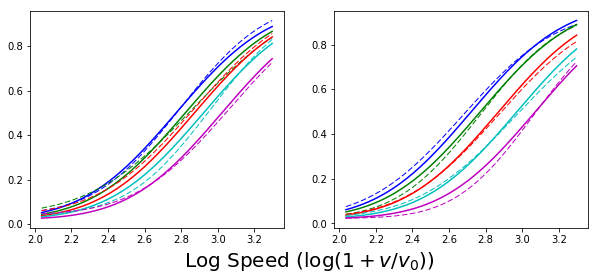

In [53]:
# check the fitted psychometric curves
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

from itertools import cycle
colors = ['b','g','r','c','m']
colorcycler1 = cycle(colors)
colorcycler2 = cycle(colors)
colorcycler3 = cycle(colors)
colorcycler4 = cycle(colors)

psyFunFitted1 = psyFun(spe, a1, b1, speedSamp[2]+muzz0, sigzz0)
psyFunFitted2 = psyFun(spe, a2, b2, speedSamp[2]+muzz1, sigzz1)
psyFun1 = psyFun(spe,aa1,bb1,mu1,si1)
psyFun2 = psyFun(spe,aa2,bb2,mu2,si2)

for i in range(5):
    axes1[0].plot(spe, psyFunFitted1[:,i], '--', lw=1, color=next(colorcycler1));
    axes1[1].plot(spe, psyFunFitted2[:,i], '--', lw=1, color=next(colorcycler2));
    axes1[0].plot(spe, psyFun1[:,i], lw=1.5, color=next(colorcycler3));
    axes1[1].plot(spe, psyFun2[:,i], lw=1.5, color=next(colorcycler4));
    
axes1[0].set_xlabel(r'Log Speed ($\log(1+v/v_0)$)', fontsize=20);
axes1[0].xaxis.set_label_coords(1.1, -0.1)

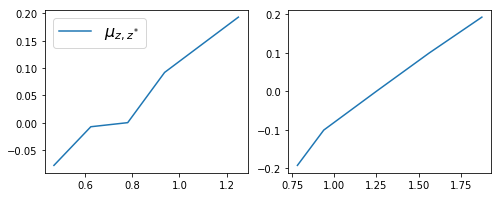

In [71]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))
axes1[0].plot(freq2,muzz0, label=r'$\mu_{z,z^*}$')
axes1[1].plot(freq1,muzz1)
axes1[0].legend(fontsize=16)

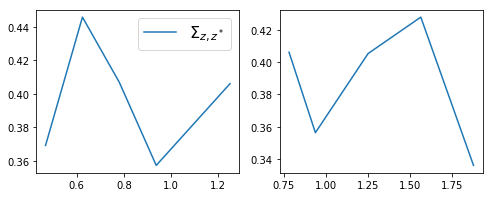

In [72]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))
axes1[0].plot(freq2,sigzz0, label=r'$\Sigma_{z,z^*}$')
axes1[1].plot(freq1,sigzz1)
axes1[0].legend(fontsize=16)

In [73]:
REP = 5
if overlap == 1:
    if aConst == 1:
        %run -i BSfitAconstOverlap0.py
    elif aLin == 1:
        %run -i BSfitAlinOverlap0.py
    else:
        %run -i BSfitOverlap0.py
else:
    if aConst == 1:
        %run -i BSfit0Aconst.py
    elif aLin == 1:
        %run -i BSfit0Alin.py
    else:
        %run -i BSfit0.py

Rep: 5 / 5 
 Global opt. 
 Progress: 100.0 %
Time (s): 130.17651701


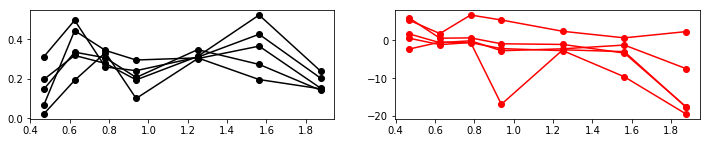

In [75]:
# fig
# check fit

fig0, axes0 = plt.subplots(nrows=1, ncols=2,figsize=(12, 2))

if aConst==1:
    a1 = xxBS[8]
    b1 = xxBS[9]
    a2 = xxBS[10]
    b2 = xxBS[11]
    axes0[0].plot(freq[0:7], np.sqrt(xxBS[1:8]), 'k-o'); #sig
    axes0[1].plot(freq[0:7], xxBS[0]*np.ones((7,REP)), 'r-o'); # a
elif aLin==1:
    a1 = xxBS[9]
    b1 = xxBS[10]
    a2 = xxBS[11]
    b2 = xxBS[12]
    axes0[0].plot(freq[0:7], np.sqrt(xxBS[2:9]), 'k-o'); #sig
    axes0[1].plot(freq[0:7], xxBS[0,np.newaxis]*freq[:,np.newaxis]+xxBS[1,np.newaxis], 'r-o'); # a
else:
    a1 = xx[14]
    b1 = xx[15]
    a2 = xx[16]
    b2 = xx[17]
    axes0[0].plot(freq[0:7], np.sqrt(xxBS[7:14]), 'k-o'); #sig
    axes0[1].plot(freq[0:7], xxBS[0:7], 'r-o'); # a
    


In [ ]:
# think to remove bad values obtained when the convergence fails

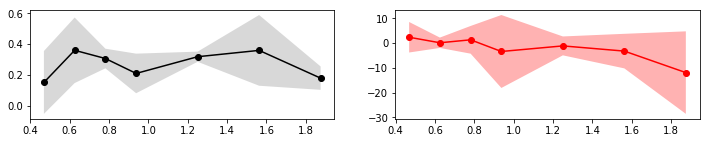

In [77]:
# fig
# check fit

fig0, axes0 = plt.subplots(nrows=1, ncols=2,figsize=(12, 2))

a1 = xxBS[8,:].mean()
b1 = xxBS[9,:].mean()
a2 = xxBS[10,:].mean()
b2 = xxBS[11,:].mean()

if aConst==1:
    sigM = np.sqrt(xxBS[1:8,:]).mean(axis=1)
    sigSTD = np.sqrt(xxBS[1:8,:]).std(axis=1)
    aM = xxBS[0,:].mean()
    aSTD = xxBS[0,:].std()


    axes0[0].plot(freq[0:7], sigM, 'k-o'); #sig
    axes0[0].fill_between(freq, sigM+2*sigSTD,sigM-2*sigSTD, alpha=0.3, facecolor='gray')
    axes0[1].plot(freq[0:7], aM*np.ones(7) , 'r-o'); # a
    axes0[1].fill_between(freq, (aM+2*aSTD)*np.ones(7),(aM-2*aSTD)*np.ones(7), alpha=0.3, facecolor='red')
elif aLin==1:
    sigM = np.sqrt(xxBS[2:9,:]).mean(axis=1)
    sigSTD = np.sqrt(xxBS[2:9,:]).std(axis=1)
    aM = xxBS[0:2,:].mean(axis=1)
    aSTD = xxBS[0:2,:].std(axis=1)

    axes0[0].plot(freq[0:7], sigM, 'k-o'); #sig
    axes0[0].fill_between(freq, sigM+2*sigSTD,sigM-2*sigSTD, alpha=0.3, facecolor='gray')
    axes0[1].plot(freq[0:7], aM[0]*freq+aM[1] , 'r-o'); # a
    axes0[1].plot(freq[0:7], az , 'r-o', color='k'); # a
    #axes0[1].set_ylim([-20,10])
    axes0[1].fill_between(freq, (aM[0]+2*aSTD[0])*freq+aM[1]+2*aSTD[1],(aM[0]-2*aSTD[0])*freq+aM[1]-2*aSTD[1],\
                          alpha=0.3, facecolor='red')
else:
    sigM = np.sqrt(xxBS[7:14,:]).mean(axis=1)
    sigSTD = np.sqrt(xxBS[7:14,:]).std(axis=1)
    aM = xxBS[0:7,:].mean(axis=1)
    aSTD = xxBS[0:7,:].std(axis=1)
    axes0[0].plot(freq[0:7], sigM, 'k-o'); #sig
    axes0[0].fill_between(freq, sigM+2*sigSTD,sigM-2*sigSTD, alpha=0.3, facecolor='gray')
    axes0[1].plot(freq[0:7], aM , 'r-o'); # a

    axes0[1].fill_between(freq, aM+2*aSTD,aM-2*aSTD, alpha=0.3, facecolor='red')


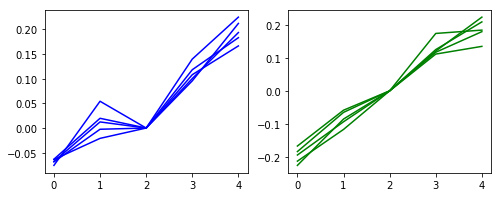

In [81]:
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))
axes1[0].plot(muzz0BS, c='b');
axes1[1].plot(muzz1BS, c='g');

In [82]:
# think to remove bad values obtained when the convergence fails

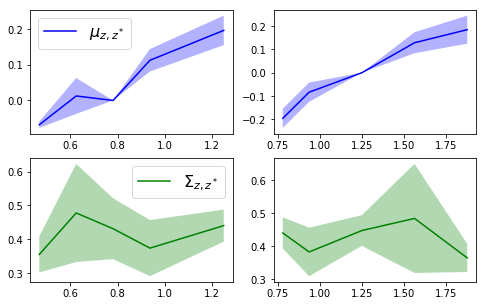

In [91]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2,figsize=(8, 5))
mu0M = muzz0BS.mean(axis=1)
mu0STD = muzz0BS.std(axis=1)
mu1M = muzz1BS.mean(axis=1)
mu1STD = muzz1BS.std(axis=1)
thresh0M = sigzz0BS.mean(axis=1)
thresh0STD = sigzz0BS.std(axis=1)
thresh1M = sigzz1BS.mean(axis=1)
thresh1STD = sigzz1BS.std(axis=1)
axes1[0,0].plot(freq2,mu0M, color='b', label=r'$\mu_{z,z^*}$')
axes1[0,0].fill_between(freq2, mu0M+2*mu0STD,mu0M-2*mu0STD, alpha=0.3, facecolor='blue')
axes1[0,1].plot(freq1,mu1M, color='b')
axes1[0,1].fill_between(freq1, mu1M+2*mu1STD,mu1M-2*mu1STD, alpha=0.3, facecolor='blue')
axes1[1,0].plot(freq2,thresh0M, color='g', label=r'$\Sigma_{z,z^*}$')
axes1[1,0].fill_between(freq2, thresh0M+2*thresh0STD,thresh0M-2*thresh0STD, alpha=0.3, facecolor='g')
axes1[1,1].plot(freq1,thresh1M, color='g')
axes1[1,1].fill_between(freq1, thresh1M+2*thresh1STD,thresh1M-2*thresh1STD, alpha=0.3, facecolor='g')

axes1[0,0].legend(fontsize=16);
axes1[1,0].legend(fontsize=16);

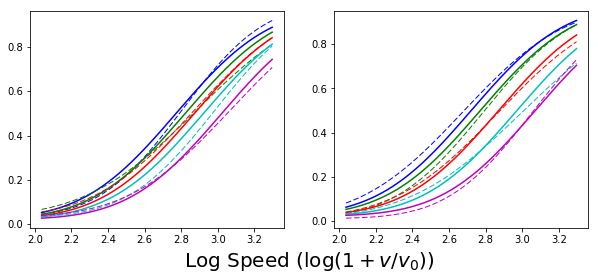

In [94]:
# check the fitted psychometric curves
fig1, axes1 = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

from itertools import cycle
colors = ['b','g','r','c','m']
colorcycler1 = cycle(colors)
colorcycler2 = cycle(colors)
colorcycler3 = cycle(colors)
colorcycler4 = cycle(colors)

if aConst==1:
    A1 = xxBS[8,:].mean()
    B1 = xxBS[9,:].mean()
    A2 = xxBS[10,:].mean()
    B2 = xxBS[11,:].mean()
elif aLin==1:
    A1 = xxBS[9,:].mean()
    B1 = xxBS[10,:].mean()
    A2 = xxBS[11,:].mean()
    B2 = xxBS[12,:].mean()
else:
    A1 = xxBS[14,:].mean()
    B1 = xxBS[15,:].mean()
    A2 = xxBS[16,:].mean()
    B2 = xxBS[17,:].mean()

    
psyFunFitted1 = psyFun(spe, A1, B1, speedSamp[2]+mu0M, thresh0M)
psyFunFitted2 = psyFun(spe, A2, B2, speedSamp[2]+mu1M, thresh1M)
psyFun1 = psyFun(spe,aa1,bb1,mu1,si1)
psyFun2 = psyFun(spe,aa2,bb2,mu2,si2)

for i in range(5):
    axes1[0].plot(spe, psyFunFitted1[:,i], '--', lw=1, color=next(colorcycler1));
    axes1[1].plot(spe, psyFunFitted2[:,i], '--', lw=1, color=next(colorcycler2));
    axes1[0].plot(spe, psyFun1[:,i], lw=1.5, color=next(colorcycler3));
    axes1[1].plot(spe, psyFun2[:,i], lw=1.5, color=next(colorcycler4));
    
axes1[0].set_xlabel(r'Log Speed ($\log(1+v/v_0)$)', fontsize=20);
axes1[0].xaxis.set_label_coords(1.1, -0.1)

In [95]:
senartxt = 'senar'+str(senar)
nBlocktxt = 'block'+str(nBlock)

In [96]:
directory = 'fit/'
if overlap == 1:
    fileName = directory+senartxt+'-'+syntxt+'-'+nBlocktxt
    if aConst == 1:
        fileName += '-aConst'
    elif aLin == 1:
        fileName += '-aLin'
else:
    fileName = directory+senartxt+'-'+syntxt
    if aConst == 1:
        fileName += '-aConst'
    elif aLin == 1:
        fileName += '-aLin'

print fileName

fit/senar3-syn-block10


In [637]:
if overlap==1:
    np.savez(fileName, xxBS=xxBS, sigM=sigM, sigSTD=sigSTD, aM=aM, aSTD=aSTD,\
         mu0M=mu0M, mu0STD=mu0STD, mu1M=mu1M, mu1STD=mu1STD, thresh0M=thresh0M,\
         thresh0STD=thresh0STD, thresh1M=thresh1M, thresh1STD=thresh1STD,\
         llhValueM=llhValueM, llhValueSTD=llhValueSTD)
else:
    np.savez(fileName, xxBS=xxBS, sigM=sigM, sigSTD=sigSTD, aM=aM, aSTD=aSTD,\
         mu0M=mu0M, mu0STD=mu0STD, thresh0M=thresh0M,\
         thresh0STD=thresh0STD,llhValueM=llhValueM, llhValueSTD=llhValueSTD)